In [9]:
# 1. kütüphaneler
from selenium import webdriver
from time import sleep
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [10]:
# web driver yüklenmesi (chrome 106 için)
driver = webdriver.Chrome(executable_path="C:/Users/Vedat/anaconda3/chromedriver.exe")

In [11]:
migros_arama = "Nescafe Gold Ekonomik Paket"

In [12]:
# site adresine gidelim
driver.get("https://www.migros.com.tr")
sleep(5)

In [13]:
# PopUp mesajı kapat
driver.find_element_by_xpath('//*[@id="close-modal"]')\
    .click()
sleep(5)

In [14]:
# cookie kapat (eğer varsa)
driver.find_element_by_xpath('/html/body/sm-root/div/fe-product-cookie-indicator/div/div/button[2]')\
    .click()
sleep(5)

In [15]:
# arama kutusu
driver.find_element_by_xpath('//*[@id="product-search-combobox--trigger"]')\
    .send_keys(migros_arama)
sleep(5)

In [16]:
# arama butonuna bas
driver.find_element_by_xpath('//*[@id="product-search-combobox-search-right-button"]')\
    .click()
sleep(5)

In [17]:
item_titles = driver.find_elements_by_xpath('//mat-card/div/a')
item_prices = driver.find_elements_by_xpath('/html/body/sm-root/div/main/sm-product/article/sm-list/div/div[4]/div[2]/div[4]/sm-list-page-item[*]/mat-card/div[2]/fe-product-price/div/div/span')
titles_list = []
prices_list = []

In [19]:
# for döngüsü ile ürünlerin ad ve fiyat bilgilerini alma

for title in item_titles:
    titles_list.append(title.text)

for prices in item_prices:
    prices_list.append(prices.text)

print(titles_list)
print(prices_list)


['Nescafe Gold Ekonomik Paket 150 G', 'Nescafe Gold Ekonomik Paket 180 G', 'Nescafe Gold Ekonomik Paket 200 G', 'Nescafe Gold 50 G Ekonomik Paket', 'Nescafe Gold Espresso Ekonomik Paket 80 G', 'Nescafe Gold Alta Rica Ekonomik Paket 70 G', 'Nescafe Gold Cap Colombia Ekonomik Paket 70 G']
['81,90 TL', '81,90 TL', '108,90 TL', '27,90 TL', '42,90 TL']


In [30]:
# Dataframe oluşturalım.
dfM = pd.DataFrame(zip(titles_list, prices_list), columns=["Ürün Adı", "Fiyat"])
dfM["Fiyat"] = dfM["Fiyat"].str.replace(",", ".")
dfM["Fiyat"] = dfM["Fiyat"].str.replace(" TL", "").astype(float)
dfM["Mağaza"] = "Migros"
print(dfM)

                                    Ürün Adı  Fiyat  Mağaza
0          Nescafe Gold Ekonomik Paket 150 G   81.9  Migros
1          Nescafe Gold Ekonomik Paket 180 G   81.9  Migros
2          Nescafe Gold Ekonomik Paket 200 G  108.9  Migros
3           Nescafe Gold 50 G Ekonomik Paket   27.9  Migros
4  Nescafe Gold Espresso Ekonomik Paket 80 G   42.9  Migros


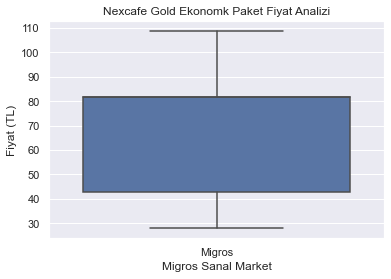

In [31]:
# Grafik alalım
sns.set()
sns.boxplot(x = "Mağaza", y = "Fiyat", data = dfM)
plt.title("Nexcafe Gold Ekonomk Paket Fiyat Analizi")
plt.ylabel("Fiyat (TL)")
plt.xlabel("Migros Sanal Market")
plt.show()